In [1]:
from matplotlib import image as img
import matplotlib.pyplot as plt
import pandas as pd
image = img.imread('./images/1.jpg')
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())

from scipy.cluster.vq import whiten
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])

from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 5)

r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.show()


(1875, 6000, 3)

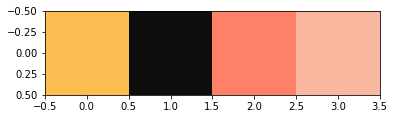

[(254, 189, 81), (14, 14, 14), (253, 128, 103), (249, 183, 160)]

In [9]:
r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.show()
colors